# Projeto Sementes

## Contextualização

O projeto da disciplina FCD...

## Organização do Grupo

*   *Gerente do Projeto*: Lucas
*   *Documentação e Relatórios*: Lucas, Paloma e Vitor
*   *Desenvolvimento e Análises*: Alexsander, Arthur e Lucas


In [1]:
#Importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Coletando dados do Excel "DadosGeminacao"
df = pd.read_csv("https://raw.githubusercontent.com/Cizika/Projeto-Sementes/master/Dados/DadosGerminacao.csv", index_col=0, delimiter= ";")

In [3]:
df

,0 Dias,5 Dias,10 Dias,15 Dias
Controle,3,3,3,3
A,2,2,2,2
B,3,3,4,4
C,3,2,3,3


In [4]:
df_proporcao = df.apply(lambda x: 100 * x/4)

In [5]:
df_proporcao


,0 Dias,5 Dias,10 Dias,15 Dias
Controle,75.0,75.0,75.0,75.0
A,50.0,50.0,50.0,50.0
B,75.0,75.0,100.0,100.0
C,75.0,50.0,75.0,75.0


In [6]:
dfg = pd.DataFrame(columns = ['Dia', 'Semente','Porcentagem'])
i = 0
for index, row in df_proporcao.iterrows():
  dfg.loc[i] = ['0', index, row['0 Dias']]
  dfg.loc[i+1] = ['5', index, row['5 Dias']]
  dfg.loc[i+2] = ['10', index, row['10 Dias']]
  dfg.loc[i+3] = ['15', index, row['15 Dias']]
  i = i + 4


In [7]:
dfc = pd.DataFrame(columns = ['Dia', 'Semente','Quantidade'])
i = 0
for index, row in df.iterrows():
  dfc.loc[i] = [0, index, row['0 Dias']]
  dfc.loc[i+1] = [5, index, row['5 Dias']]
  dfc.loc[i+2] = [10, index, row['10 Dias']]
  dfc.loc[i+3] = [15, index, row['15 Dias']]
  i = i + 4

### Medidas Descritivas

In [8]:
# Calcular todas as medidas de posição, medidas de dispersão referentes ao projeto
# Analisar os resultados
# Responsável: Alexsander
def coef_var(table):
    return 100*table.std()/table.mean()
def amplitude(table):
    return table.max() - table.min()

df_proporcao.agg(["min","max","mean","median","std","var",coef_var,amplitude])

,0 Dias,5 Dias,10 Dias,15 Dias
min,50.000000,50.000000,50.000000,50.000000
max,75.000000,75.000000,100.000000,100.000000
mean,68.750000,62.500000,75.000000,75.000000
median,75.000000,62.500000,75.000000,75.000000
std,12.500000,14.433757,20.412415,20.412415
var,156.250000,208.333333,416.666667,416.666667
coef_var,18.181818,23.094011,27.216553,27.216553
amplitude,25.000000,25.000000,50.000000,50.000000


### Gráficos

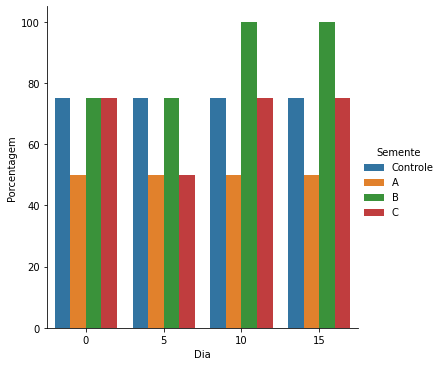

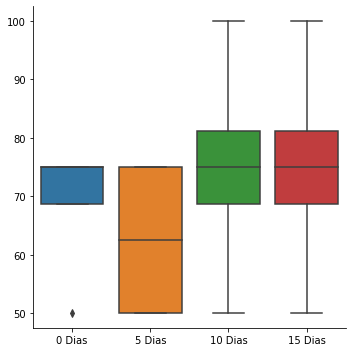

In [9]:
# Gerar e analisar gráficos de variáveis estratégicas (a discutir)
# Responsável: Alexsander

sns.catplot(kind="bar",x='Dia', y='Porcentagem', hue='Semente', data=dfg)
sns.catplot(kind="box", data=df_proporcao)

### Incertezas e Comparações Estatísticas

In [10]:
# Calcular os intervalos de confianças
# Realizar Comparações estatísticas com base nesses intervalos
# Analisar os resultados
# Responsável: Arthur

### Segmentação de Dados

In [11]:
# Gerar Tabelas de Frequência e Contigência
# Gráficos dessas tabelas
# Segmentar os dados (a discutir)
# Analisar Resultados
# Responsável: Alexsander
dfs = dfc.groupby(['Dia','Semente']).max().unstack(0)
fsem = pd.DataFrame(columns = ['Porcentagem'])
total = 0
for index, row in dfs.iterrows():
  fsem.loc[index] = [100*row.sum()]
  total = total + row.sum()
fsem = fsem/total
fsem.head()



,Porcentagem
A,17.7778
B,31.1111
C,24.4444
Controle,26.6667


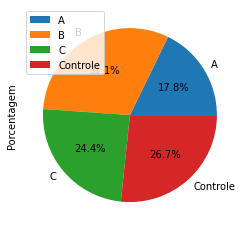

In [12]:
fsem.plot.pie(autopct="%.1f%%",subplots = True);


In [13]:
dfs.loc['Total'] = dfs.sum()
dfs = dfs.stack(1)
dfs = dfs.unstack(0)

In [14]:
total = 0
fdias = pd.DataFrame(columns = ['Porcentagem'])
for index, row in dfs.iterrows():
  if(index!='Total'):
    fdias.loc[index] = [100*row.sum()]
    total = total + row.sum()
fdias = fdias/total
fdias.head(4)

,Porcentagem
0,24.4444
5,22.2222
10,26.6667
15,26.6667


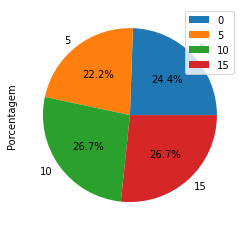

In [15]:
fdias.plot.pie(autopct="%.1f%%",subplots = True);

In [16]:
dfs.loc['Total'] = dfs.sum()
dfs = dfs.stack(1)
dfs = dfs.unstack(0)

In [17]:
dfs.head()

Quantidade                  
Dia               0   5  10  15 Total
Semente                              
A                 2   2   2   2     8
B                 3   3   4   4    14
C                 3   2   3   3    11
Controle          3   3   3   3    12
Total            11  10  12  12    45

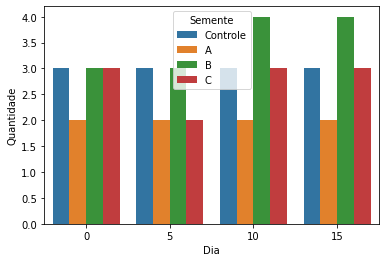

In [18]:
sns.barplot(x="Dia",y='Quantidade', hue="Semente", data=dfc)